In [77]:
import numpy as np
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [78]:
#loading the dataset
df=pd.read_csv('/kaggle/input/montcoalert/911.csv')
#showing the dataset
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [79]:
    #getting prliminary information about the datset
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [80]:
#checking for missing values in the datset
df.isna().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [81]:
{column:len(df[column].unique()) for column in df.columns if df[column].dtype=='object'}

{'desc': 663282, 'title': 148, 'timeStamp': 640754, 'twp': 69, 'addr': 41292}

In [82]:
def get_sequences(texts,vocab_length=10000):
    tokenizer=Tokenizer(num_words=vocab_length)
    tokenizer.fit_on_texts(texts)
    sequences=tokenizer.texts_to_sequences(texts)
    max_seg_length=np.max([len(sequences) for sequences in sequences])
    sequences=pad_sequences(sequences,maxlen=max_seg_length,padding='post')
    return sequences

# Preprocessing the Dataset

In [92]:
def onehot_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [112]:
def preprocess_inputs(df):
    #creating a copy of the dateframe
    df=df.copy()
    #apply lambda function to extract the type part from the title column
    df['type']=df['title'].apply(lambda x:x.split(':')[0])
    df['timeStamp']=pd.to_datetime(df['timeStamp'])
    df['year']=df['timeStamp'].dt.year
    df['month']=df['timeStamp'].dt.month
    df['day']=df['timeStamp'].dt.day
    df['hour']=df['timeStamp'].dt.hour
    df['minute']=df['timeStamp'].dt.minute
    df['second']=df['timeStamp'].dt.second
    df=df.drop('timeStamp',axis=1)
    # Get sequences for desc and addr column and (and drop original column)
    vocab_length=10000
    desc_sequences=get_sequences(df['desc'],vocab_length=vocab_length)
    addr_sequences=get_sequences(df['addr'],vocab_length=vocab_length)
    
    
    
    
    
    
    
    
    df=df.drop(['desc','addr'],axis=1)
    #dropping the title column
    df=df.drop('title',axis=1)
    y=df['type'].copy()
    x=df.drop('type',axis=1)
    
    #onehot_encode
    
    column_to_encode=['zip','twp']
    x=onehot_encode(x,column_to_encode,prefixes=['z','t'])
    for column in x.columns:
        if x[column].dtype=='bool':
            x[column]=x[column].astype(int)
            
            
    label_mapping={'EMS':0, 'Fire':1, 'Traffic':2}
    
    
    y=y.replace(label_mapping)
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
    return x,desc_sequences,addr_sequences,y

In [85]:
['zip','twp']

['zip', 'twp']

In [86]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [113]:
x,desc_sequences,addr_sequences,y=preprocess_inputs(df)


/tmp/ipykernel_30/1575837557.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=y.replace(label_mapping)


In [114]:
x

,lat,lng,e,year,month,day,hour,minute,second,z_1104.0,...,t_UPPER MORELAND,t_UPPER POTTSGROVE,t_UPPER PROVIDENCE,t_UPPER SALFORD,t_WEST CONSHOHOCKEN,t_WEST NORRITON,t_WEST POTTSGROVE,t_WHITEMARSH,t_WHITPAIN,t_WORCESTER
0,40.297876,-75.581294,1,2015,12,10,17,10,52,0,...,0,0,0,0,0,0,0,0,0,0
1,40.258061,-75.264680,1,2015,12,10,17,29,21,0,...,0,0,0,0,0,0,0,0,0,0
2,40.121182,-75.351975,1,2015,12,10,14,39,21,0,...,0,0,0,0,0,0,0,0,0,0
3,40.116153,-75.343513,1,2015,12,10,16,47,36,0,...,0,0,0,0,0,0,0,0,0,0
4,40.251492,-75.603350,1,2015,12,10,16,56,52,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,1,2020,7,29,15,46,51,0,...,0,0,0,0,0,0,0,0,0,0
663518,40.136306,-75.428697,1,2020,7,29,15,52,19,0,...,0,0,0,0,0,0,0,0,0,0
663519,40.013779,-75.300835,1,2020,7,29,15,52,52,0,...,0,0,0,0,0,0,0,0,0,0
663520,40.121603,-75.351437,1,2020,7,29,15,54,8,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
for column in x.columns:
    if x[column].dtype=='bool':
        x[column]=x[column].astype(int)


In [120]:
x_train,x_test,desc_train,desc_test,addr_train,addr_test,y_train,y_test=train_test_split(x,desc_sequences,addr_sequences,y,train_size=0.7,random_state=123)

In [128]:
print(x_train.shape[1])
print(x_test.shape[1])
print(desc_train.shape[1])
print(desc_test.shape[1])
print(addr_train.shape[1])
print(addr_test.shape[1])

281
281
24
24
15
15


# Constructing the Model

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 24)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_18      │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 24, 64)    │    640,000 │ input_layer_17[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 15, 64)    │    640,000 │ input_layer_18[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_16      │ (None, 281)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 1536)      │          0 │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 960)       │          0 │ embedding_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 2777)      │          0 │ input_layer_16[0… │
│ (Concatenate)       │                   │            │ flatten_6[0][0],  │
│                     │                   │            │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 3)         │      8,334 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,288,334 (4.91 MB)

 Trainable params: 1,288,334 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

None


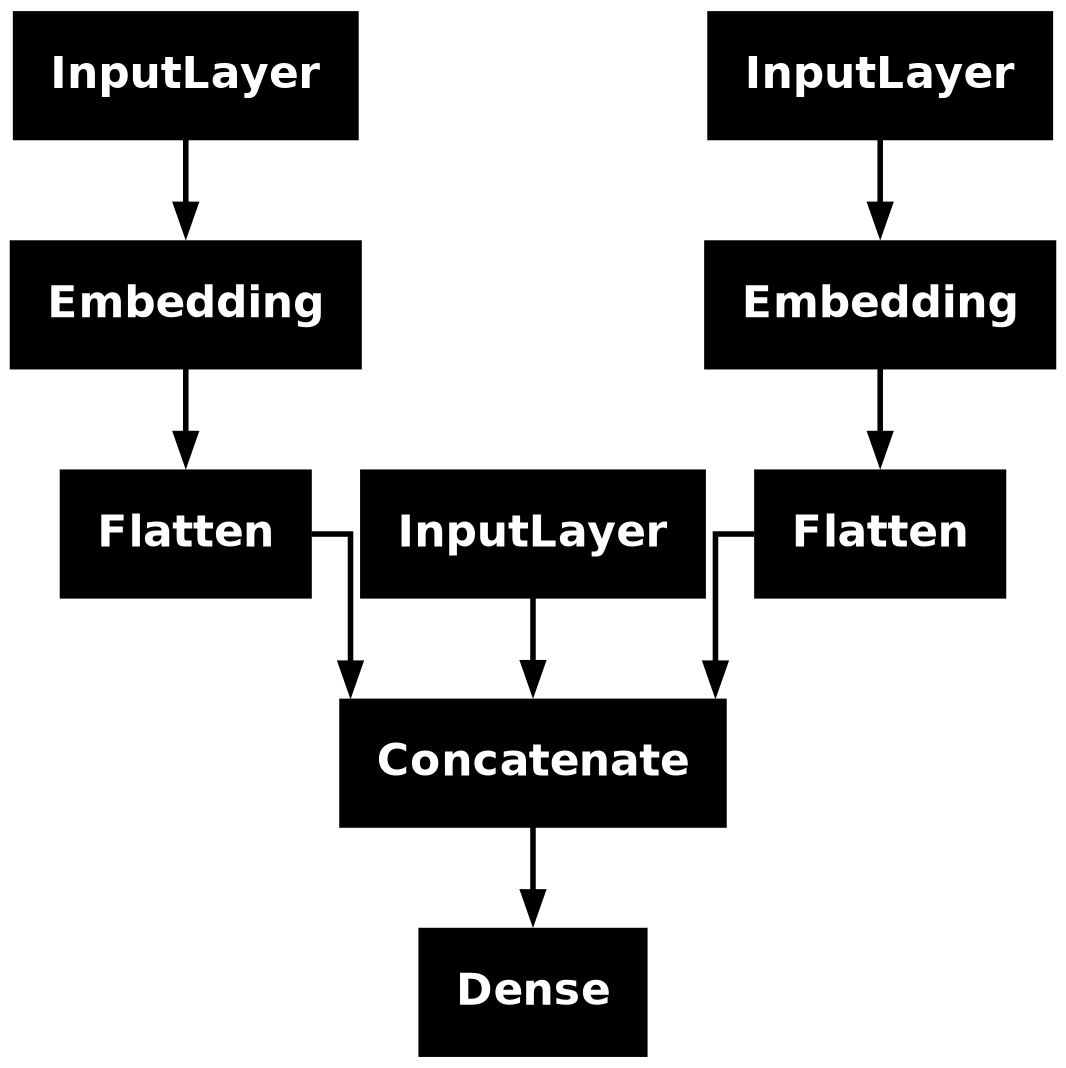

In [142]:
x_inputs=tf.keras.Input(shape=(x_train.shape[1],))
desc_inputs=tf.keras.Input(shape=(desc_train.shape[1],))
addr_inputs=tf.keras.Input(shape=(addr_train.shape[1],))
x_dense1=tf.keras.layers.Dense(64,activation='relu')(x_inputs)
x_dense2=tf.keras.layers.Dense(64,activation='relu')(x_dense1)

#desc
desc_embedding=tf.keras.layers.Embedding(input_dim=10000,
                                        output_dim=64,
                                        input_length=desc_train.shape[1])(desc_inputs)
desc_flatten=tf.keras.layers.Flatten()(desc_embedding)



#addr
addr_embedding=tf.keras.layers.Embedding(input_dim=10000,
                                        output_dim=64,
                                        input_length=desc_train.shape[1])(addr_inputs)
addr_flatten=tf.keras.layers.Flatten()(addr_embedding)

concat=tf.keras.layers.concatenate([x_inputs,desc_flatten,addr_flatten])

#making predictions
outputs=tf.keras.layers.Dense(3,activation='softmax')(concat)
model=tf.keras.Model(inputs=[x_inputs,desc_inputs,addr_inputs],outputs=outputs)


print(model.summary())
tf.keras.utils.plot_model(model)

# Training the Model

In [145]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit([x_train,desc_train,addr_train],y_train,validation_split=0.2,batch_size=32,epochs=20,callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])




Epoch 1/20
11612/11612 ━━━━━━━━━━━━━━━━━━━━ 97s 8ms/step - accuracy: 0.9721 - loss: 0.5625 - val_accuracy: 0.9996 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 2/20
11612/11612 ━━━━━━━━━━━━━━━━━━━━ 98s 8ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 2.3245e-05 - learning_rate: 0.0010
Epoch 3/20
11612/11612 ━━━━━━━━━━━━━━━━━━━━ 94s 8ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9999 - val_loss: 5.1335e-04 - learning_rate: 0.0010
Epoch 4/20
11612/11612 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9999 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 5/20
11612/11612 ━━━━━━━━━━━━━━━━━━━━ 100s 9ms/step - accuracy: 0.9999 - loss: 6.5978e-04 - val_accuracy: 0.9999 - val_loss: 3.7352e-04 - learning_rate: 0.0010
Epoch 6/20
11612/11612 ━━━━━━━━━━━━━━━━━━━━ 94s 8ms/step - accuracy: 0.9999 - loss: 3.5217e-04 - val_accuracy: 0.9999 - val_loss: 8.2026e-04 - learning_rate: 0.0010
Epoch 7/20
11612/11612 ━━━━━━━━━━

In [147]:
model.evaluate([x_test,desc_test,addr_test],y_test)

6221/6221 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 5.0653e-05


[7.778200233587995e-05, 0.9999949932098389]

In [132]:
len(desc_train[0])

24

In [111]:
y.unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [ ]:
x.info()

In [ ]:
pd.to_datetime(df['timeStamp']).dt.month